<a href="https://colab.research.google.com/github/zoran-data/colab_notebooks/blob/main/Case_Study_Sales_Data_Analyst_Nurse_Staffing_Q2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import plotly.express as px


In [ ]:
# data link https://data.cms.gov/quality-of-care/payroll-based-journal-daily-nurse-staffing/data

# Step 1: Load the Data
file_path = '/content/drive/MyDrive/Colab Notebooks/case_study/PBJ_Daily_Nurse_Staffing_Q2_2024.csv'
pbj_data = pd.read_csv(file_path, encoding='latin1')

<ipython-input-30-490a7a20b79e>:5: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
# Print the columns of the dataset
print("Columns in the dataset:")
print(pbj_data.columns.tolist())


Columns in the dataset:
['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS', 'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr']


In [ ]:
# Get basic information about the DataFrame
print(pbj_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325324 entries, 0 to 1325323
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1325324 non-null  object 
 1   PROVNAME          1325324 non-null  object 
 2   CITY              1325324 non-null  object 
 3   STATE             1325324 non-null  object 
 4   COUNTY_NAME       1325324 non-null  object 
 5   COUNTY_FIPS       1325324 non-null  int64  
 6   CY_Qtr            1325324 non-null  object 
 7   WorkDate          1325324 non-null  int64  
 8   MDScensus         1325324 non-null  int64  
 9   Hrs_RNDON         1325324 non-null  float64
 10  Hrs_RNDON_emp     1325324 non-null  float64
 11  Hrs_RNDON_ctr     1325324 non-null  float64
 12  Hrs_RNadmin       1325324 non-null  float64
 13  Hrs_RNadmin_emp   1325324 non-null  float64
 14  Hrs_RNadmin_ctr   1325324 non-null  float64
 15  Hrs_RN            1325324 non-null  float64
 16  

In [ ]:
# Specify the file path
file_path = "/content/drive/MyDrive/Colab Notebooks/case_study/PBJ_Daily_Nurse_Staffing_Q2_2024.csv"

# Read the CSV file, handling potential data type issues and encoding
pbj_data = pd.read_csv(
    file_path,
    dtype={"PROVNUM": str},  # Specify PROVNUM as string to handle potential inconsistencies
    encoding="latin1"
)

# Display the first few rows to inspect the data
print(pbj_data.head())

  PROVNUM                  PROVNAME          CITY STATE COUNTY_NAME  \
0  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
1  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
2  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
3  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
4  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   

   COUNTY_FIPS  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  ...  Hrs_LPN_ctr  \
0           59  2024Q2  20240401         51      10.77  ...          0.0   
1           59  2024Q2  20240402         52       8.43  ...          0.0   
2           59  2024Q2  20240403         53      11.13  ...          0.0   
3           59  2024Q2  20240404         52      12.27  ...          0.0   
4           59  2024Q2  20240405         52       4.95  ...          0.0   

   Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  Hrs_NAtrn  Hrs_NAtrn_emp  Hrs_NAtrn_ctr  \
0   160.08       160.08          0.

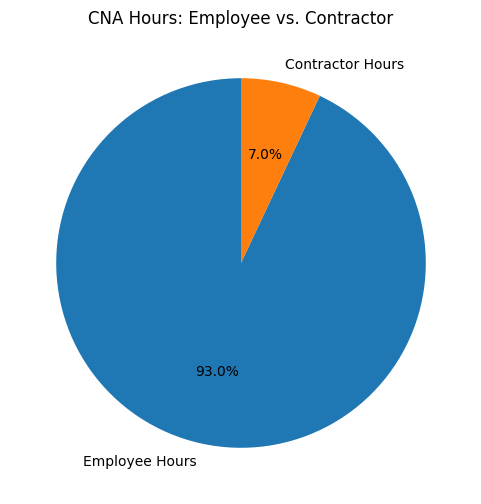

In [ ]:
# Visualization: CNA Hours - Employee vs. Contractor

# Aggregate CNA hours by employee and contractor
cna_hours = pbj_data[['Hrs_CNA_emp', 'Hrs_CNA_ctr']].sum()
cna_data = {
    'Category': ['Employee Hours', 'Contractor Hours'],
    'Hours': cna_hours.values
}

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(cna_data['Hours'], labels=cna_data['Category'], autopct='%1.1f%%', startangle=90)
plt.title('CNA Hours: Employee vs. Contractor')
plt.show()


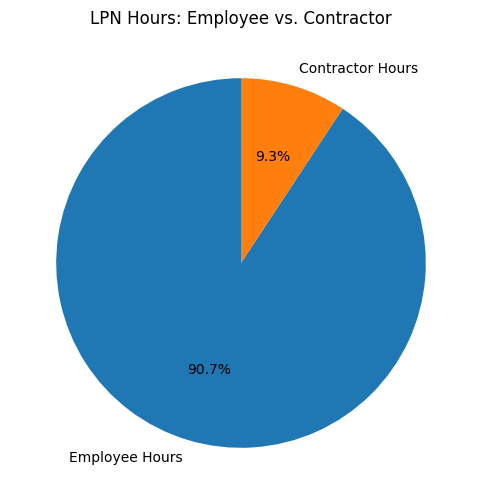

In [ ]:
# Aggregate LPN hours by employee and contractor
lpn_hours = pbj_data[['Hrs_LPN_emp', 'Hrs_LPN_ctr']].sum()
lpn_data = {
    'Category': ['Employee Hours', 'Contractor Hours'],
    'Hours': lpn_hours.values
}

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(lpn_data['Hours'], labels=lpn_data['Category'], autopct='%1.1f%%', startangle=90)
plt.title('LPN Hours: Employee vs. Contractor')
plt.show()


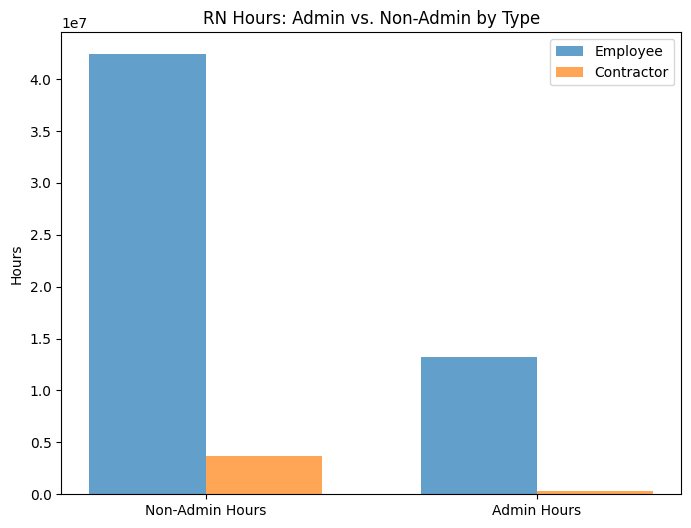

In [ ]:
import numpy as np

# Aggregate RN hours by admin/non-admin and employee/contractor
rn_data = {
    'Category': ['Non-Admin Hours', 'Admin Hours'],
    'Employee': [
        pbj_data['Hrs_RN_emp'].sum(),
        pbj_data['Hrs_RNadmin_emp'].sum()
    ],
    'Contractor': [
        pbj_data['Hrs_RN_ctr'].sum(),
        pbj_data['Hrs_RNadmin_ctr'].sum()
    ]
}

# Convert to DataFrame for plotting
rn_df = pd.DataFrame(rn_data)

# Create a grouped bar chart
bar_width = 0.35
x = np.arange(len(rn_df['Category']))
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width / 2, rn_df['Employee'], bar_width, label='Employee', alpha=0.7)
plt.bar(x + bar_width / 2, rn_df['Contractor'], bar_width, label='Contractor', alpha=0.7)
plt.xticks(x, rn_df['Category'])
plt.ylabel('Hours')
plt.title('RN Hours: Admin vs. Non-Admin by Type')
plt.legend()
plt.show()


<ipython-input-48-752daf12d77a>:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-48-752daf12d77a>:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



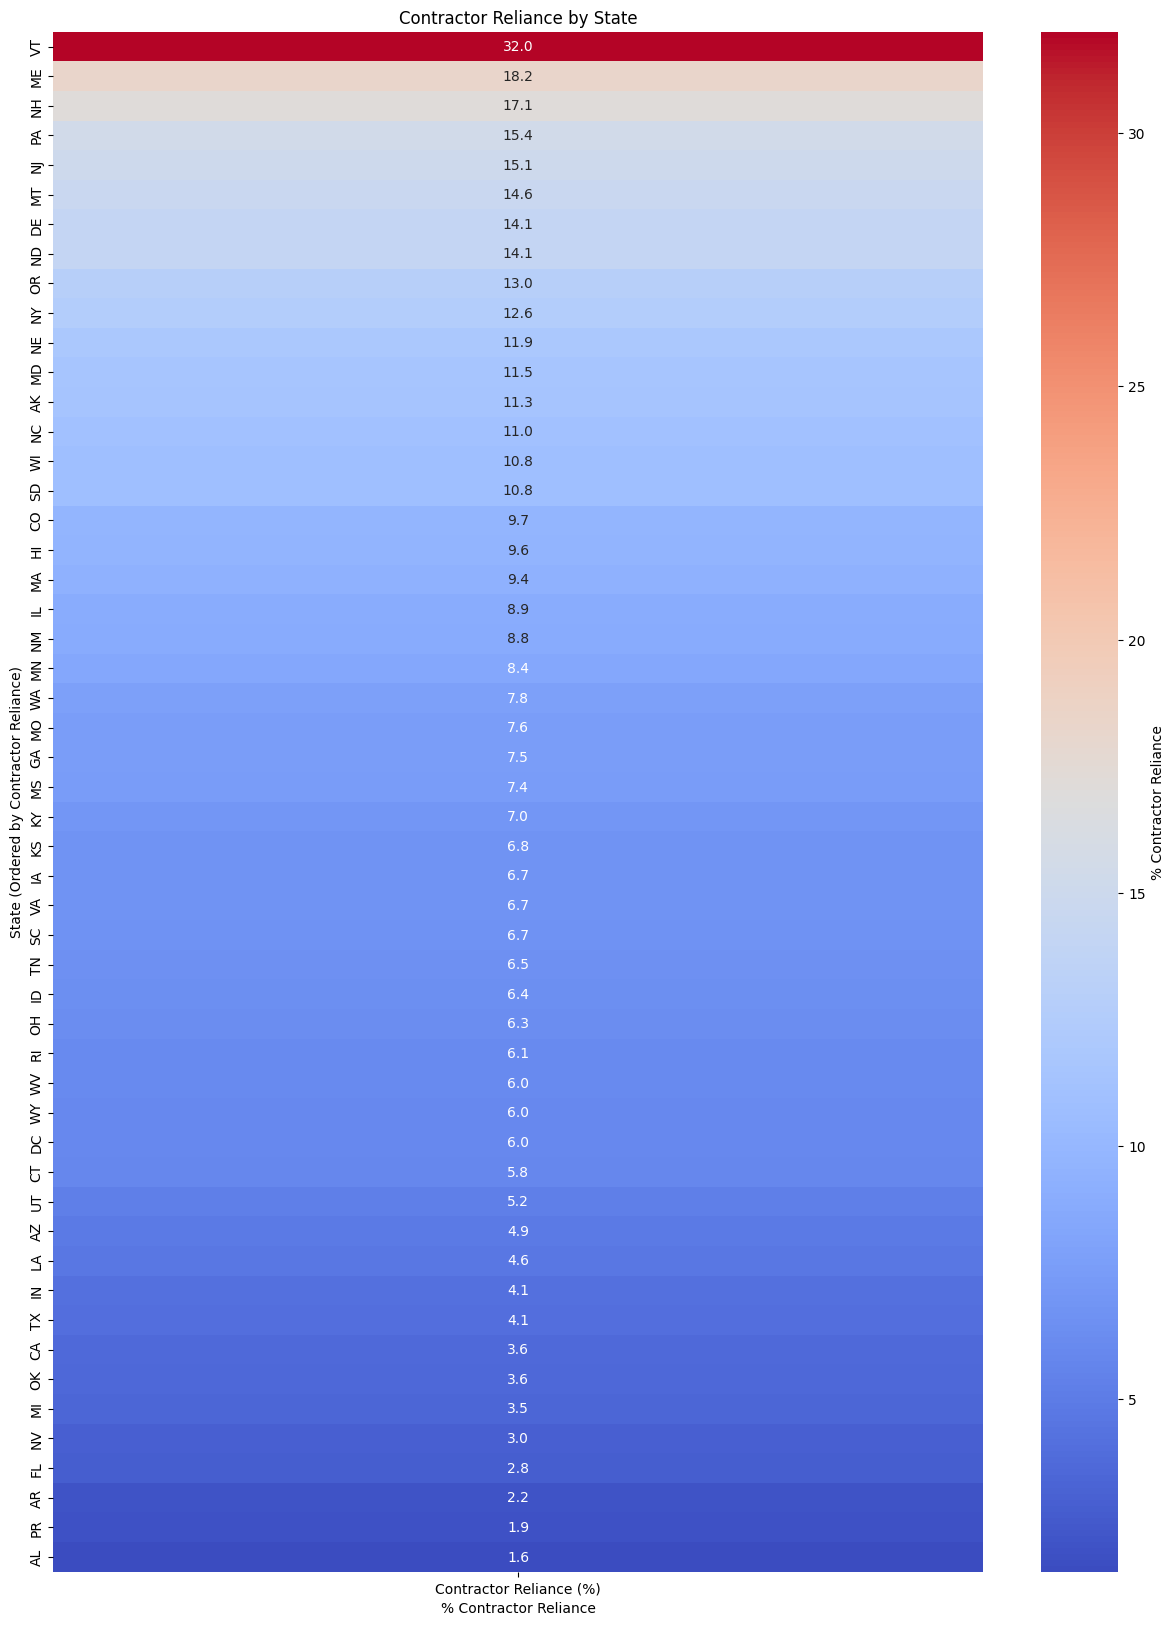

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate contractor reliance by state
state_reliance = pbj_data.groupby('STATE').apply(
    lambda x: x['Hrs_CNA_ctr'].sum() + x['Hrs_LPN_ctr'].sum() + x['Hrs_RN_ctr'].sum()
)
total_hours_by_state = pbj_data.groupby('STATE').apply(
    lambda x: x['Hrs_CNA'].sum() + x['Hrs_LPN'].sum() + x['Hrs_RN'].sum()
)
state_reliance_percentage = (state_reliance / total_hours_by_state * 100).fillna(0)

# Convert to DataFrame for heatmap and sort by reliance
state_data = pd.DataFrame({
    'State': state_reliance_percentage.index,
    'Contractor Reliance (%)': state_reliance_percentage.values
}).sort_values('Contractor Reliance (%)', ascending=False)

# Create a heatmap with sorted states
plt.figure(figsize=(15, 20))
sns.heatmap(
    state_data.set_index('State'),  # Ensure states are sorted by reliance
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    cbar_kws={'label': '% Contractor Reliance'}
)
plt.title('Contractor Reliance by State')
plt.ylabel('State (Ordered by Contractor Reliance)')
plt.xlabel('% Contractor Reliance')
plt.show()


In [ ]:
# Calculate total administrative hours and total nursing hours
pbj_data['Admin_Hours'] = pbj_data['Hrs_LPNadmin'] + pbj_data['Hrs_RNadmin']
pbj_data['Calculated_Total_Hours'] = pbj_data[
    ['Hrs_CNA', 'Hrs_LPN', 'Hrs_MedAide', 'Hrs_RN', 'Hrs_NAtrn', 'Hrs_RNDON']
].sum(axis=1)

# Group by city to calculate averages and select top 30 cities by MDScensus
city_data = pbj_data.groupby('CITY').agg({
    'Admin_Hours': 'mean',
    'Calculated_Total_Hours': 'mean',
    'MDScensus': 'sum'
}).reset_index()
city_data = city_data.nlargest(15, 'MDScensus')

# Calculate efficiency
city_data['Efficiency'] = city_data['Calculated_Total_Hours'] / city_data['Admin_Hours']

# Fit a linear regression model to calculate trendline
X = city_data[['Admin_Hours']]
y = city_data['Calculated_Total_Hours']
linear_model = LinearRegression().fit(X, y)
city_data['Trendline'] = linear_model.predict(X)
city_data['Above_Line'] = city_data['Calculated_Total_Hours'] > city_data['Trendline']

# Plot the relationship with different colors for above and below the line
fig = px.scatter(
    city_data,
    x='Admin_Hours',
    y='Calculated_Total_Hours',
    color='Above_Line',  # Color based on whether above or below the line
    text='CITY',
    title='Relationship Between Total Nursing Hours and Administrative Hours',
    labels={
        'Admin_Hours': 'Average Administrative Hours',
        'Calculated_Total_Hours': 'Average Total Nursing Hours',
        'Above_Line': 'Above Trendline'
    }
)
fig.add_scatter(x=city_data['Admin_Hours'], y=city_data['Trendline'], mode='lines', name='Trendline')
fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis_title='Average Administrative Hours',
    yaxis_title='Average Total Nursing Hours',
    height=1000  # Increase the height to avoid overlapping city names.
)
fig.show()

# Compare efficiency metrics across top cities
city_efficiency = city_data.sort_values(by='Efficiency', ascending=False)
print("Efficiency Metrics by City:")
print(city_efficiency[['CITY', 'Efficiency']])


Efficiency Metrics by City:
              CITY  Efficiency
527          BRONX   37.097721
3127      NEW YORK   25.125539
534       BROOKLYN   23.937496
224      BALTIMORE   22.263844
2542   LOS ANGELES   21.981603
782        CHICAGO   21.676479
2818         MIAMI   21.603382
2137  JACKSONVILLE   19.107305
3522  PHILADELPHIA   18.376127
2050       HOUSTON   16.888759
810     CINCINNATI   16.415171
3842     ROCHESTER   16.275044
908       COLUMBUS   15.928470
2549    LOUISVILLE   14.184188
3987   SAN ANTONIO   13.110459


In [ ]:
import plotly.graph_objects as go

# Create the Plotly figure
fig = go.Figure()

# Add traces for each category in the stacked bar chart
fig.add_trace(go.Bar(
    y=states,
    x=rn_employee_non_admin,
    name='RN Employee Non-Admin',
    orientation='h',
    marker=dict(color='#5DA5DA')  # Soft blue
))

fig.add_trace(go.Bar(
    y=states,
    x=rn_contractor_non_admin,
    name='RN Contractor Non-Admin',
    orientation='h',
    marker=dict(color='#60BD68')  # Soft green
))

fig.add_trace(go.Bar(
    y=states,
    x=rn_employee_admin,
    name='RN Employee Admin',
    orientation='h',
    marker=dict(color='#FAA43A')  # Muted orange
))

fig.add_trace(go.Bar(
    y=states,
    x=rn_contractor_admin,
    name='RN Contractor Admin',
    orientation='h',
    marker=dict(color='#F17CB0')  # Light pink
))

fig.add_trace(go.Bar(
    y=states,
    x=lpn_employee_non_admin,
    name='LPN Employee Non-Admin',
    orientation='h',
    marker=dict(color='#B2912F')  # Brownish gold
))

fig.add_trace(go.Bar(
    y=states,
    x=lpn_contractor_non_admin,
    name='LPN Contractor Non-Admin',
    orientation='h',
    marker=dict(color='#DECF3F')  # Pale yellow
))

fig.add_trace(go.Bar(
    y=states,
    x=lpn_employee_admin,
    name='LPN Employee Admin',
    orientation='h',
    marker=dict(color='#F15854')  # Coral red
))

fig.add_trace(go.Bar(
    y=states,
    x=lpn_contractor_admin,
    name='LPN Contractor Admin',
    orientation='h',
    marker=dict(color='#4D4D4D')  # Gray
))

fig.add_trace(go.Bar(
    y=states,
    x=cna_employee_non_admin,
    name='CNA Employee Non-Admin',
    orientation='h',
    marker=dict(color='#A6CEE3')  # Light blue
))

fig.add_trace(go.Bar(
    y=states,
    x=cna_contractor_non_admin,
    name='CNA Contractor Non-Admin',
    orientation='h',
    marker=dict(color='#BCBD22')  # Olive green
))

# Update layout for better readability
fig.update_layout(
    barmode='stack',
    title={
        'text': 'LPN, RN, CNA Hours by State: Admin vs. Non-Admin (Employee vs. Contractor)',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(title='Total Hours'),
    yaxis=dict(title='State', categoryorder='total ascending'),
    legend=dict(
        title='Roles and Categories',
        orientation='h',
        y=-0.2,  # Position below the chart
        x=0.5,
        xanchor='center'
    ),
    height=1200,  # Adjust height for better visualization
    width=1400,   # Adjust width for clarity
    template='plotly_white'  # Use a clean, professional template
)

# Show the interactive chart
fig.show()


# Statisical Testing

### Chi-Square Test:
To compare proportions of contractor vs. employee hours.
### T-Test or ANOVA:
To compare mean hours between roles, states, or categories (admin vs. non-admin).
### Correlation or Regression:
To test relationships or predict contractor reliance based on other variables.

In [ ]:
# Chi-Square
from scipy.stats import chi2_contingency

# Create a contingency table (e.g., hours by employee vs. contractor across states)
data = pbj_data
contingency_table = pd.crosstab(data['STATE'], data[['Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPN_emp', 'Hrs_LPN_ctr']].sum(axis=1))

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square: {chi2}, p-value: {p}")


Chi-Square: 3845732.4501109337, p-value: 0.0


#### Interpretation of Chi-Square Results
Chi-Square Value:

A Chi-Square statistic of 3,845,732 indicates a very large difference between the observed and expected proportions of employee vs. contractor hours across the states or roles.
P-Value:

A p-value of 0.0 (or effectively less than the threshold, typically 0.05) strongly rejects the null hypothesis (𝐻0).
This means that the proportions of employee and contractor hours are significantly different across the tested groups (e.g., states or roles).

In [ ]:
# ANOVA for Role Comparison Across States

from scipy.stats import f_oneway

# Group hours by roles across states
data = pbj_data

# Correctly subset the columns using a list
cna_hours = data.groupby('STATE')[['Hrs_CNA_emp', 'Hrs_CNA_ctr']].sum().sum(axis=1)
lpn_hours = data.groupby('STATE')[['Hrs_LPN_emp', 'Hrs_LPN_ctr']].sum().sum(axis=1)
rn_hours = data.groupby('STATE')[['Hrs_RN_emp', 'Hrs_RN_ctr']].sum().sum(axis=1)

# Perform ANOVA
f_stat, p_value = f_oneway(cna_hours, lpn_hours, rn_hours)
print(f"F-Statistic: {f_stat}, p-value: {p_value}")


F-Statistic: 19.154932965269936, p-value: 3.766915298479862e-08


#### Interpretation of ANOVA Results
F-Statistic:

The F-Statistic of 19.15 indicates a significant variation between the mean hours worked by CNAs, LPNs, and RNs across states.
A higher F-statistic suggests that the differences between group means are not due to random chance.
P-Value:

The p-value of 3.77e-08 (essentially 0.0000000377) is far below the standard significance threshold of 0.05.
This strongly rejects the null hypothesis (𝐻0), which assumes that the mean hours worked by CNAs, LPNs, and RNs across states are the same.

### T-Tests for Administrative vs. Non-Administrative Roles
Test: Independent Samples T-Test
Purpose: Assess whether the mean hours for administrative roles differ significantly from non-administrative roles.
Example:
Null Hypothesis (𝐻0): The mean hours for administrative and non-administrative roles are equal.

In [ ]:
from scipy.stats import ttest_ind

# Separate admin and non-admin hours
data = pbj_data

admin_hours = data[['Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr']].sum(axis=1)
non_admin_hours = data[['Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA_emp', 'Hrs_CNA_ctr']].sum(axis=1)

# Perform T-test
t_stat, p_value = ttest_ind(admin_hours, non_admin_hours, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_value}")


T-Statistic: -1665.1587213654482, p-value: 0.0


### Regression Analysis for Predicting Contractor Reliance
Test: Linear Regression
Purpose: Model the factors influencing contractor reliance (e.g., state, role, administrative vs. non-administrative hours).


In [ ]:
import statsmodels.api as sm

data = pbj_data

# Define dependent and independent variables
X = data[['Hrs_RN_emp', 'Hrs_LPN_emp', 'Hrs_CNA_emp', 'Hrs_RNadmin_emp', 'Hrs_LPNadmin_emp']]
y = data[['Hrs_RN_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr']].sum(axis=1)

# Add a constant for the regression
X = sm.add_constant(X)

# Perform regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                 1.045e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:05:42   Log-Likelihood:            -7.0398e+06
No. Observations:             1325324   AIC:                         1.408e+07
Df Residuals:                 1325318   BIC:                         1.408e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.7965      0.080  

### Interpretation of OLS Regression Results
Model Overview
Dependent Variable (y): Likely represents contractor hours (or another metric you're trying to predict) based on the explanatory variables (e.g., employee hours for different roles).
R-squared (0.038):
Only 3.8% of the variance in the dependent variable is explained by the model.
This indicates the model has limited predictive power, suggesting other important factors influencing y are not included.
F-statistic (1.045e+04):
The very high F-statistic and its p-value of 0.00 indicate that at least one of the predictors is significantly related to the dependent variable.
Coefficients and Their Interpretation
const (11.7965):

This is the intercept of the model, representing the predicted value of y when all other predictors are zero.
Indicates a baseline contractor hour value of ~11.80.
Hrs_RN_emp (0.0254):

A 1-unit increase in RN employee hours is associated with a 0.0254 increase in y.
Positive and statistically significant (p < 0.05), indicating RN employee hours positively influence contractor hours.
Hrs_LPN_emp (-0.0950):

A 1-unit increase in LPN employee hours is associated with a 0.095 decrease in y.
Negative and statistically significant, suggesting that more LPN employee hours reduce contractor reliance.
Hrs_CNA_emp (0.0681):

A 1-unit increase in CNA employee hours is associated with a 0.0681 increase in y.
Positive and statistically significant, indicating that CNA employee hours may correlate with higher contractor reliance, potentially due to turnover or insufficient staffing.
Hrs_RNadmin_emp (0.4152):

A 1-unit increase in RN administrative employee hours is associated with a 0.4152 increase in y.
Strongly positive and significant, showing RN administrative roles are linked to higher contractor reliance, possibly reflecting additional needs for specialized staff.
Hrs_LPNadmin_emp (-0.1416):

A 1-unit increase in LPN administrative employee hours is associated with a 0.1416 decrease in y.
Negative and significant, indicating that administrative LPN roles reduce contractor reliance.
Insights
Limited Predictive Power:

The low R-squared suggests this model explains only a small portion of the variance in contractor hours.
We could consider including additional variables like facility size, regional trends, or turnover rates for better predictions.
Role-Specific Impacts:

Positive Predictors:
CNA employee hours and RN administrative hours are positively associated with contractor hours, likely reflecting unmet staffing needs.
Negative Predictors:
LPN employee hours and LPN administrative hours reduce contractor reliance, suggesting stability in these roles.
RN Administrative Needs:

The strong positive coefficient for RN administrative hours highlights a significant demand for contractors in management or supervisory positions.
